In [419]:
#Creating Dataset
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [420]:
#Load Dataset
Home_data = pd.read_csv('HomeC.csv')
nan_removed = pd.DataFrame.dropna(pd.DataFrame(Home_data))
nan_removed.value_counts()

C:\Users\M-SI\AppData\Local\Temp\ipykernel_1832\675098868.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  Home_data = pd.read_csv('HomeC.csv')


time        use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  Solar [kW]  temperature  icon         humidity  visibility  summary     apparentTemperature  pressure  windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  precipProbability
1451624400  0.932833  0.003483  0.932833            0.000033         0.020700        0.061917        0.442633          0.124150     0.006983          0.013083          0.000417         0.000150         0.000000         0.031350   0.001017   0.004067        0.001517          0.003483    36.14        clear-night  0.62      10.00       Clear       29.26                1016.91   9.18       cloudCover  282.0        0.0000           24.40     0.00                 1
1451960350  0.498450  0.054750  0.498450            0.000000         0.020100

In [421]:
# get random sample from nan_removed
random_sample = nan_removed.sample(n=1000, random_state=24)
random_sample.value_counts()

time        use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  Solar [kW]  temperature  icon                 humidity  visibility  summary        apparentTemperature  pressure  windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  precipProbability
1451624500  0.622300  0.003417  0.622300            0.000100         0.230600        0.062317        0.043500          0.004917     0.123583          0.012783          0.000750         0.000200         0.000000         0.031883   0.001000   0.004250        0.001700          0.003417    35.87        partly-cloudy-night  0.61      10.00       Mostly Cloudy  29.40                1016.25   8.29       0.75        285.0        0.0000           23.90     0.00                 1
1451975692  0.474383  0.003083  0.474383            0.0

In [422]:
# split the dataframe into 3 type of summary Clear, Cloudy, and overcast
clear = random_sample[random_sample['summary'] == 'Clear']
cloudy = random_sample[random_sample['summary'] == 'Partly Cloudy']
overcast = random_sample[random_sample['summary'] == 'Overcast']

In [423]:
# combine the 3 dataframe into 1
frames = [clear, cloudy, overcast]
result = pd.concat(frames)

# give label to the summary
result['summary'] = result['summary'].map({'Clear':0, 'Partly Cloudy':1, 'Overcast':2})

In [424]:
#Generating SVM soft Margin
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0
        
        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result

In [425]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [426]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -0.25)
    x1_2_m = get_hyperplane(x0_2, w, b, -0.25)

    x1_1_p = get_hyperplane(x0_1, w, b, 0.25)
    x1_2_p = get_hyperplane(x0_2, w, b, 0.25)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-0.25,x1_max+0.25])
    
    plt.title(title)
    plt.show()

In [427]:
# select the best x values with y values is result['summary'] for using SVM with the best accuracy
X1 = result[['use [kW]','humidity']].values
X2 = result[['gen [kW]','humidity']].values
X3 = result[['precipIntensity', 'humidity']].values
X4 = result[['gen [kW]','precipIntensity']].values
X5 = result[['use [kW]','precipIntensity']].values

# select the best y values with y values is result['summary'] for using SVM with the best accuracy
y = result['summary'].values
y = np.where(y <= 0, -1, 1)

In [428]:
#Implementing into each Datasets
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y)

For dataset 1, score:  0.8420454545454545


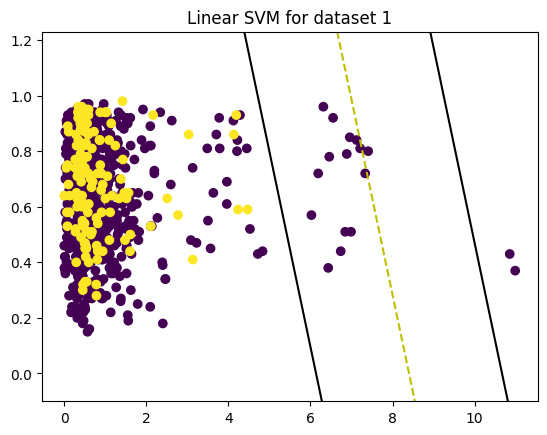

In [429]:
print("For dataset 1, score: ", accuracy_score(svm1.predict(X1),y))
plot_svm(X1, y, w1, b1, title= 'Linear SVM for dataset 1')

In [430]:
#Implementing into each Datasets
svm2 = SVM_soft_margin()
w2,b2 = svm2.fit(X2,y)

For dataset 2, score:  0.8454545454545455


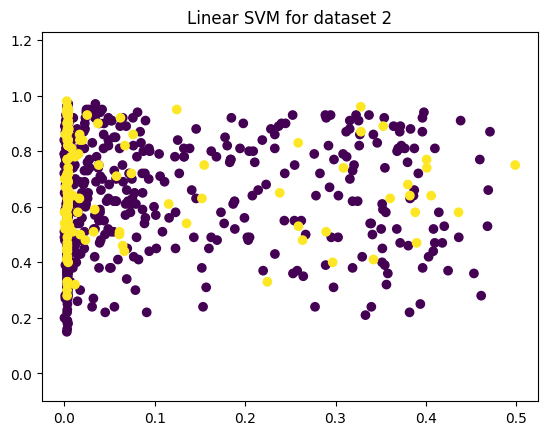

In [431]:
print("For dataset 2, score: ", accuracy_score(svm2.predict(X2),y))
plot_svm(X2, y, w2, b2, title= 'Linear SVM for dataset 2')

In [432]:
#Implementing into each Datasets
svm3 = SVM_soft_margin()
w3,b3 = svm3.fit(X3,y)

For dataset 3, score:  0.8454545454545455


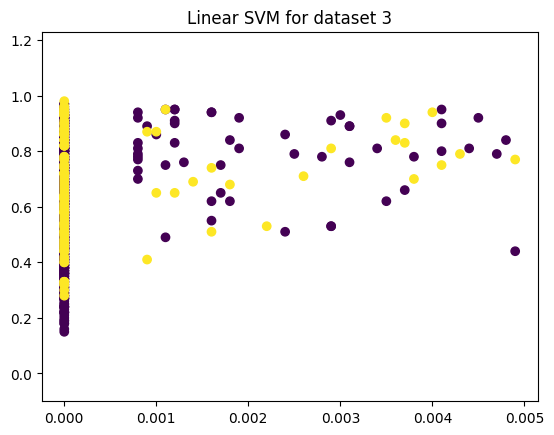

In [433]:
print("For dataset 3, score: ", accuracy_score(svm3.predict(X3),y))
plot_svm(X3, y, w3, b3, title= 'Linear SVM for dataset 3')

In [434]:
#Implementing into each Datasets
svm4 = SVM_soft_margin()
w4,b4 = svm4.fit(X4,y)

For dataset 4, score:  0.8454545454545455


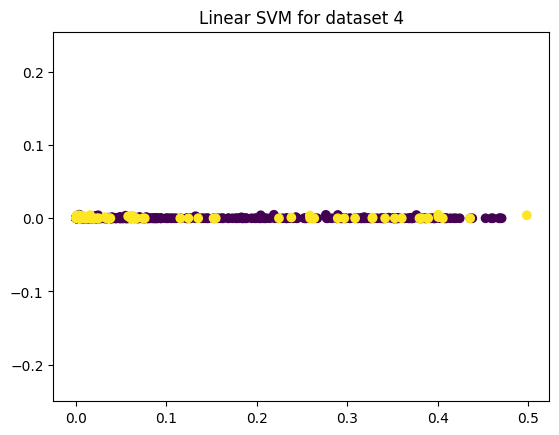

In [435]:
print("For dataset 4, score: ", accuracy_score(svm4.predict(X4),y))
plot_svm(X4, y, w4, b4, title= 'Linear SVM for dataset 4')

In [436]:
#Implementing into each Datasets
svm5 = SVM_soft_margin()
w5,b5 = svm5.fit(X5,y)

For dataset 5, score:  0.8431818181818181


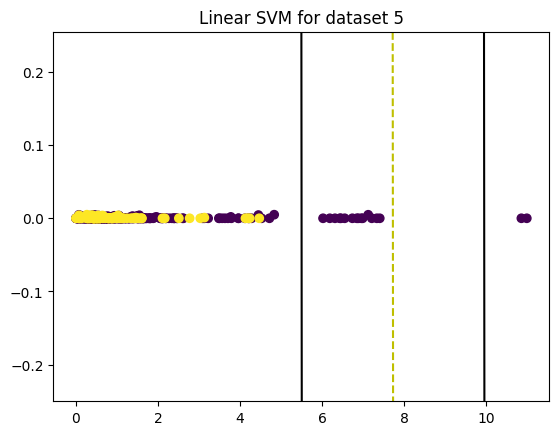

In [437]:
print("For dataset 5, score: ", accuracy_score(svm5.predict(X5),y))
plot_svm(X5, y, w5, b5, title= 'Linear SVM for dataset 5')